<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/DL/Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Diagnosis with NN

I am using [Breast Cancer Wisconsin (Diagnostic) Data Set
](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data) for this tutorial. 

Features available with this data set are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.<br>
The diagnosed labels are 'M' and 'B' which correspond to malignant and benign.  

Let's train a simple neural network to predict the tumor type given the features computed from digitized images. 


Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [2]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

from sklearn import metrics

## Load and analyse the data set

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied-AI/DL/data/cancer_data.csv')

# summarise the details
print(f'Number of entries: {len(df)}')
df.head()

Number of entries: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


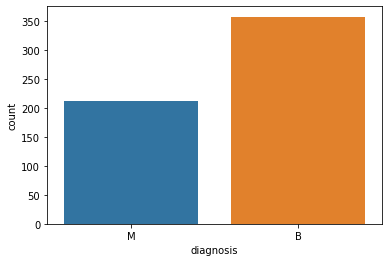

In [9]:
# Summarise class details
sns.countplot(x=df['diagnosis'])

## Extracting labels and features

In [ ]:
# extract labels
y = df['diagnosis']
y = pd.Series(y)
print(y.value_counts())

# remove unnecessary columns
X = df.drop(['id', 'diagnosis'], axis=1)
print(X.info())
X.head()

B    357
M    212
Name: diagnosis, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since we have characters ('M' and 'B') as labels, they need to be converted into numeric values. <br>
This can be easily done using a LabelEncoder

In [ ]:
# create LabelEncoder for labels 
le = LabelEncoder()
le.fit(y)

LabelEncoder()

In [ ]:
# Convert labels into numeric values
y = le.transform(y)

y = pd.Series(y)
print(y.value_counts())

0    357
1    212
dtype: int64


## M1

As the initial model, let's think about a simple model using 8 features and 2 hidden layers.

![](https://github.com/HHansi/Applied-AI-Course/blob/main/Images/Simple_neural_network.png?raw=true)


Let's select first 8 features for this model. 

In [ ]:
X1 = X.iloc[:, 0:8]
X1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


### Split Data

In [ ]:
# split data to train and validation sets
X_train1, X_val1, y_train1, y_val1 = train_test_split(X1, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train1)}')
print(f'validation data set size: {len(X_val1)}')

training data set size: 398
validation data set size: 171


### Build Model

A [Sequential](https://keras.io/guides/sequential_model/) model is appropriate for a plain stack of layers.<br>
The layers of network can be defined using [Dense](https://keras.io/api/layers/core_layers/dense/) layers (regular densely-connected NN layers)

More details about model training using Keras can be found in the documentation: [Model training APIs](https://keras.io/api/models/model_training_apis/#compile-method).

In [ ]:
# define the keras model
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
model1.fit(X_train1, y_train1, batch_size=50, epochs=60, validation_data=(X_val1, y_val1))

Epoch 1/60
8/8 [==============================] - 1s 68ms/step - loss: 45.9408 - accuracy: 0.4006 - val_loss: 33.4781 - val_accuracy: 0.4035
Epoch 2/60
8/8 [==============================] - 0s 8ms/step - loss: 31.5379 - accuracy: 0.3516 - val_loss: 15.7650 - val_accuracy: 0.4035
Epoch 3/60
8/8 [==============================] - 0s 8ms/step - loss: 12.3841 - accuracy: 0.3749 - val_loss: 0.6011 - val_accuracy: 0.8363
Epoch 4/60
8/8 [==============================] - 0s 8ms/step - loss: 2.0002 - accuracy: 0.7448 - val_loss: 4.5036 - val_accuracy: 0.6082
Epoch 5/60
8/8 [==============================] - 0s 24ms/step - loss: 2.8836 - accuracy: 0.6748 - val_loss: 0.7578 - val_accuracy: 0.7544
Epoch 6/60
8/8 [==============================] - 0s 7ms/step - loss: 1.1394 - accuracy: 0.7305 - val_loss: 1.0256 - val_accuracy: 0.7544
Epoch 7/60
8/8 [==============================] - 0s 8ms/step - loss: 0.8061 - accuracy: 0.7886 - val_loss: 0.8765 - val_accuracy: 0.8070
Epoch 8/60
8/8 [===========

### Validate Model

Validation accuracy is measure by previous step too. But, let's see how to do it separately.

In [ ]:
# get model predictions
y_pred1 = model1.predict(X_val1)
print(y_pred1[:10])

[[0.99231267]
 [0.6719942 ]
 [0.999998  ]
 [0.01731357]
 [0.01614392]
 [0.02052468]
 [0.9991933 ]
 [0.99999356]
 [0.11461711]
 [0.01016641]]


In [ ]:
# convert to categorical predictions
y_pred_categorical1 = [1 if pred > 0.5 else 0 for pred in y_pred1]
print(y_pred_categorical1[:10])

[1, 1, 1, 0, 0, 0, 1, 1, 0, 0]


In [ ]:
# measure accuracy
accuracy = metrics.accuracy_score(y_val1, y_pred_categorical1)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8538011695906432


### Test Predictions

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied-AI/DL/data/cancer_data_test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              6 non-null      float64
 1   texture_mean             6 non-null      float64
 2   perimeter_mean           6 non-null      float64
 3   area_mean                6 non-null      float64
 4   smoothness_mean          6 non-null      float64
 5   compactness_mean         6 non-null      float64
 6   concavity_mean           6 non-null      float64
 7   concave points_mean      6 non-null      float64
 8   symmetry_mean            6 non-null      float64
 9   fractal_dimension_mean   6 non-null      float64
 10  radius_se                6 non-null      float64
 11  texture_se               6 non-null      float64
 12  perimeter_se             6 non-null      float64
 13  area_se                  6 non-null      float64
 14  smoothnes

In [ ]:
X_test1 = X_test.iloc[:, 0:8]
X_test1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.093530
1,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917
2,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400
3,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.021800
4,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300


In [ ]:
test_pred = model1.predict(X_test1)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)

[[0.02236259]
 [0.00791666]
 [0.08078754]
 [0.00563475]
 [1.        ]
 [0.00439397]]
[0, 0, 0, 0, 1, 0]
['B' 'B' 'B' 'B' 'M' 'B']


## M2

Let's build a more complex model with 30 features and more neurons. 

In [ ]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Split Data

In [ ]:
# split data to train and validation sets
X_train2, X_val2, y_train2, y_val2 = train_test_split(X, y, test_size=0.3, random_state=100)
print(f'training data set size: {len(X_train2)}')
print(f'validation data set size: {len(X_val2)}')

training data set size: 398
validation data set size: 171


### Build Model

In [ ]:
# define the keras model
model2 = Sequential()
model2.add(Dense(64, input_dim=30, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                1984      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile the keras model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# train model
model2.fit(X_train2, y_train2, batch_size=50, epochs=60, validation_data=(X_val2, y_val2))

Epoch 1/60
8/8 [==============================] - 1s 37ms/step - loss: 25.2042 - accuracy: 0.3803 - val_loss: 13.1142 - val_accuracy: 0.5965
Epoch 2/60
8/8 [==============================] - 0s 8ms/step - loss: 6.3375 - accuracy: 0.5262 - val_loss: 2.5134 - val_accuracy: 0.3801
Epoch 3/60
8/8 [==============================] - 0s 7ms/step - loss: 2.3495 - accuracy: 0.6040 - val_loss: 2.5220 - val_accuracy: 0.4561
Epoch 4/60
8/8 [==============================] - 0s 8ms/step - loss: 1.6477 - accuracy: 0.5894 - val_loss: 0.3488 - val_accuracy: 0.8655
Epoch 5/60
8/8 [==============================] - 0s 7ms/step - loss: 0.4963 - accuracy: 0.8260 - val_loss: 0.4004 - val_accuracy: 0.8713
Epoch 6/60
8/8 [==============================] - 0s 8ms/step - loss: 0.3236 - accuracy: 0.9106 - val_loss: 0.2321 - val_accuracy: 0.9123
Epoch 7/60
8/8 [==============================] - 0s 8ms/step - loss: 0.3164 - accuracy: 0.8870 - val_loss: 0.2111 - val_accuracy: 0.9298
Epoch 8/60
8/8 [===============

### Test Predictions

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Applied-AI/DL/data/cancer_data_test.csv')

# summarise the details
print(f'Number of entries: {len(df_test)}')

X_test = df_test.drop(['id'], axis=1)
print(X_test.info())

Number of entries: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              6 non-null      float64
 1   texture_mean             6 non-null      float64
 2   perimeter_mean           6 non-null      float64
 3   area_mean                6 non-null      float64
 4   smoothness_mean          6 non-null      float64
 5   compactness_mean         6 non-null      float64
 6   concavity_mean           6 non-null      float64
 7   concave points_mean      6 non-null      float64
 8   symmetry_mean            6 non-null      float64
 9   fractal_dimension_mean   6 non-null      float64
 10  radius_se                6 non-null      float64
 11  texture_se               6 non-null      float64
 12  perimeter_se             6 non-null      float64
 13  area_se                  6 non-null      float64
 14  smoothnes

In [ ]:
test_pred = model2.predict(X_test)
print(test_pred)

test_pred_categorical = [1 if pred > 0.5 else 0 for pred in test_pred]
print(test_pred_categorical)

test_pred_encoded = le.inverse_transform(test_pred_categorical)
print(test_pred_encoded)

[[0.8215139 ]
 [0.00703016]
 [0.88419247]
 [0.00459763]
 [1.        ]
 [0.30599135]]
[1, 0, 1, 0, 1, 0]
['M' 'B' 'M' 'B' 'M' 'B']


## Randomness in neural networks

Intial weights of a neural network are assigned randomly. Therefore, for same data set with same structure and parameter setting results can be slightly varied at different runs. <br>
Example: If you train model M2 twice, you will not obtain same accuracy for both runs. 